1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform

2. *Переписать данный туториал на PyTorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

In [26]:
import os
import torch
import numpy as np
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch import nn
from torch import optim

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [28]:
DATASET_PATH = r'/media/dmitriy/Disk/Downloads/ai_torch_for_nn_data/'
train_dataset = torchvision.datasets.CIFAR10(root= DATASET_PATH,
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

Files already downloaded and verified


In [29]:
image, label = train_dataset[0]
print(image.size())
print(label)

torch.Size([3, 32, 32])
6


In [30]:
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

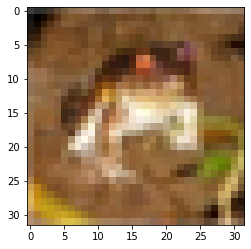

In [31]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [32]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=1024, 
                                           shuffle=True)

In [33]:
test_dataset = torchvision.datasets.CIFAR10(root=DATASET_PATH, train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [34]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [35]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 8 * hidden_dim)
        self.fc4 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc5 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc6 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc7 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.leaky_relu(x)
        x = self.fc6(x)
        x = F.leaky_relu(x)
        x = self.fc7(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.leaky_relu(x)
        x = self.fc6(x)
        x = F.leaky_relu(x)
        x = self.fc7(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)

In [36]:
net = net.to(device)

In [37]:
criterion = nn.CrossEntropyLoss().to(device)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.0)
optimizer = optim.Adam(net.parameters(), lr=0.001, eps=10**(-16))

In [38]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]
        optimizer.zero_grad()
        outputs = net(inputs.to(device))
        loss = criterion(outputs.to(device), labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

Epoch [1/10]. Step [1/49]. Loss: 0.002


Epoch [2/10]. Step [1/49]. Loss: 0.002
Epoch [3/10]. Step [1/49]. Loss: 0.002
Epoch [4/10]. Step [1/49]. Loss: 0.002
Epoch [5/10]. Step [1/49]. Loss: 0.002
Epoch [6/10]. Step [1/49]. Loss: 0.002
Epoch [7/10]. Step [1/49]. Loss: 0.001
Epoch [8/10]. Step [1/49]. Loss: 0.002
Epoch [9/10]. Step [1/49]. Loss: 0.001
Epoch [10/10]. Step [1/49]. Loss: 0.001


In [39]:
PATH_WEIGHTS = os.path.join(DATASET_PATH, r'cifar_net_test_version_weights.pth')
torch.save(net.state_dict(), PATH_WEIGHTS)

In [40]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param, "\t", net.state_dict()[param].size())

Model state_dict: 
fc1.weight 	 torch.Size([400, 3072])
fc1.bias 	 torch.Size([400])
fc2.weight 	 torch.Size([400, 400])
fc2.bias 	 torch.Size([400])
fc3.weight 	 torch.Size([800, 400])
fc3.bias 	 torch.Size([800])
fc4.weight 	 torch.Size([400, 800])
fc4.bias 	 torch.Size([400])
fc5.weight 	 torch.Size([200, 400])
fc5.bias 	 torch.Size([200])
fc6.weight 	 torch.Size([100, 200])
fc6.bias 	 torch.Size([100])
fc7.weight 	 torch.Size([10, 100])
fc7.bias 	 torch.Size([10])


In [41]:
PATH_MODEL = os.path.join(DATASET_PATH, r'cifar_net_test_version_model.pth')
torch.save(net, PATH_MODEL)

In [42]:
net = Net(3072, 100, 10)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=800, bias=True)
  (fc4): Linear(in_features=800, out_features=400, bias=True)
  (fc5): Linear(in_features=400, out_features=200, bias=True)
  (fc6): Linear(in_features=200, out_features=100, bias=True)
  (fc7): Linear(in_features=100, out_features=10, bias=True)
)

In [43]:
net = torch.load(PATH_MODEL)

In [44]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

In [45]:
net.eval()
outputs = net(images.to(device))
imgs = torchvision.utils.make_grid(images)

In [46]:
len(images)

8

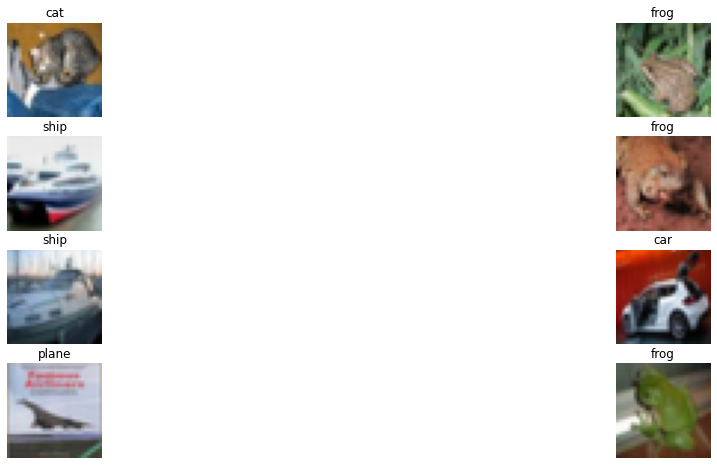

In [47]:
n_rows = 4
fig, axes = plt.subplots(n_rows, len(images) // n_rows, figsize=(20, 8))
for i in range(len(images)):
    axes[i % n_rows][i // n_rows].set_title(classes[labels[i]])
    axes[i % n_rows][i // n_rows].imshow(images[i].numpy().transpose((1, 2, 0)))
    axes[i % n_rows][i // n_rows].axis('off')
plt.show()

In [48]:
net.predict(images.to(device));

/tmp/ipykernel_64346/4153325567.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [49]:
_, predicted = torch.max(outputs, 1)
predicted

tensor([3, 8, 8, 8, 6, 6, 5, 6], device='cuda:0')

In [50]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'ship' 'ship' 'frog' 'frog' 'dog' 'frog']
Accuracy is 0.75
